In [1]:
import tensorflow as tf

2023-11-23 18:08:50.545059: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-23 18:08:50.545086: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-23 18:08:50.545107: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 18:08:50.550218: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-23 18:08:51.266515: W tensorflow/compiler/

In [2]:
tf.config.list_physical_devices("GPU")

2023-11-23 18:08:52.363009: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-23 18:08:52.408008: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-23 18:08:52.408286: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
import os
path = "../snack_data/snack_full_empty/"
os.listdir(path)

['full75.34.jpg',
 'empty33.277.jpg',
 'empty33.17.jpg',
 'empty50.84.jpg',
 'empty25.121.jpg',
 'empty50.292.jpg',
 'empty33.41.jpg',
 'full75.50.jpg',
 'full100.148.jpg',
 'full75.184.jpg',
 'full75.233.jpg',
 'empty0.31.jpg',
 'empty25.190.jpg',
 'full100.182.jpg',
 'empty0.53.jpg',
 'empty25.147.jpg',
 'empty50.145.jpg',
 'full100.137.jpg',
 'full100.199.jpg',
 'full75.142.jpg',
 'empty33.228.jpg',
 'empty50.28.jpg',
 'empty0.97.jpg',
 'empty0.3.jpg',
 'empty0.30.jpg',
 'empty25.59.jpg',
 'empty50.2.jpg',
 'empty33.204.jpg',
 'empty33.150.jpg',
 'empty0.91.jpg',
 'full100.44.jpg',
 'empty33.209.jpg',
 'empty50.231.jpg',
 'empty33.287.jpg',
 'full75.129.jpg',
 'empty33.163.jpg',
 'empty25.245.jpg',
 'empty50.165.jpg',
 'empty0.151.jpg',
 'empty0.1.jpg',
 'empty50.155.jpg',
 'empty50.69.jpg',
 'empty0.50.jpg',
 'empty25.141.jpg',
 'empty50.37.jpg',
 'empty0.35.jpg',
 'empty50.239.jpg',
 'empty0.268.jpg',
 'full75.296.jpg',
 'empty25.82.jpg',
 'empty0.57.jpg',
 'empty0.115.jpg',
 'ful

In [5]:
snack_names = os.listdir(path)
snack_labels = [each.split('.')[0] for each in snack_names]
snack_id =[each.split('.')[1] for each in snack_names]

In [6]:
len(snack_names)

1800

In [7]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

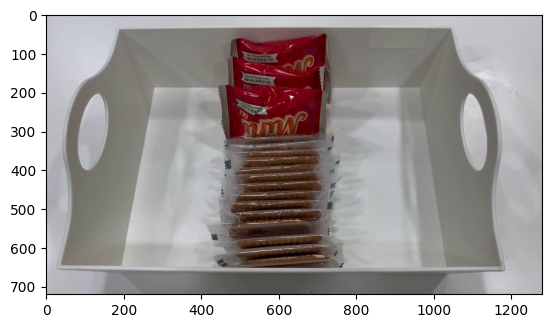

In [8]:
sample = random.choice(snack_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()

In [9]:
sample = random.choice(snack_names)
image = mpimg.imread(path+ sample)
image.shape

(720, 1280, 3)

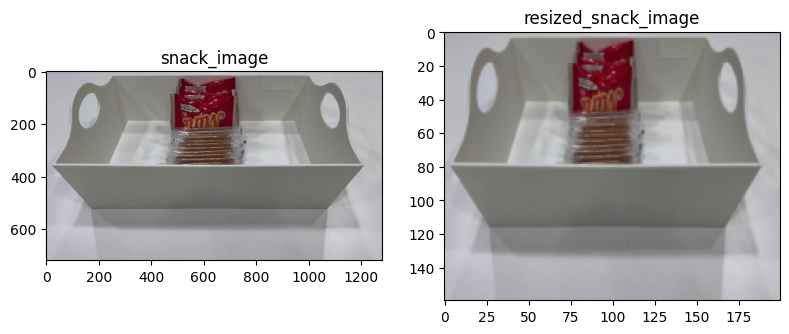

In [10]:
from skimage.transform import resize
resized = resize(image, (160, 200, 3)) #300, 300 크기로 변경

fig, axes = plt.subplots(1, 2, figsize =(8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap = plt.cm.gray)
ax[0].set_title("snack_image")
ax[1].imshow(resized, cmap =plt.cm.gray)
ax[1].set_title("resized_snack_image")

fig.tight_layout()
plt.show()

In [11]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(snack_names)
for file in bar_total:
    image = mpimg.imread(path+file)
    images.append(resize(image, (160, 200, 3)))

images = np.array(images)

  0%|          | 0/1800 [00:00<?, ?it/s]

In [12]:
images.shape, snack_names[:5]

((1800, 160, 200, 3),
 ['full75.34.jpg',
  'empty33.277.jpg',
  'empty33.17.jpg',
  'empty50.84.jpg',
  'empty25.121.jpg'])

In [13]:
images[:3]

array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.29018231, 0.26670772, 0.26654326],
         [0.29019431, 0.26885746, 0.26220533],
         [0.2901948 , 0.2705627 , 0.25650297]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.29142594, 0.26795134, 0.26778688],
         [0.28968133, 0.26834448, 0.26169235],
         [0.28978409, 0.27015198, 0.25609225]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.40829153, 0.38481674, 0.38465287],
         [0.33336088, 0.3120162 , 0.30538856],
         [0.29960581, 0.27996282, 0.26596227]],

        ...,

        [[0.74509859, 0.73725545, 0.74117702],
         [0.74521347, 0.73730019, 0.74122175]

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(snack_labels)
snack_labels_encoded = encoder.transform(snack_labels)
snack_labels_encoded[:3], encoder.classes_

(array([5, 2, 2]),
 array(['empty0', 'empty25', 'empty33', 'empty50', 'full100', 'full75'],
       dtype='<U7'))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test =\
                train_test_split(images, snack_labels_encoded, test_size =0.2,
                                 random_state = 13, stratify  = snack_labels_encoded)
X_train.shape, X_test.shape

((1440, 160, 200, 3), (360, 160, 200, 3))

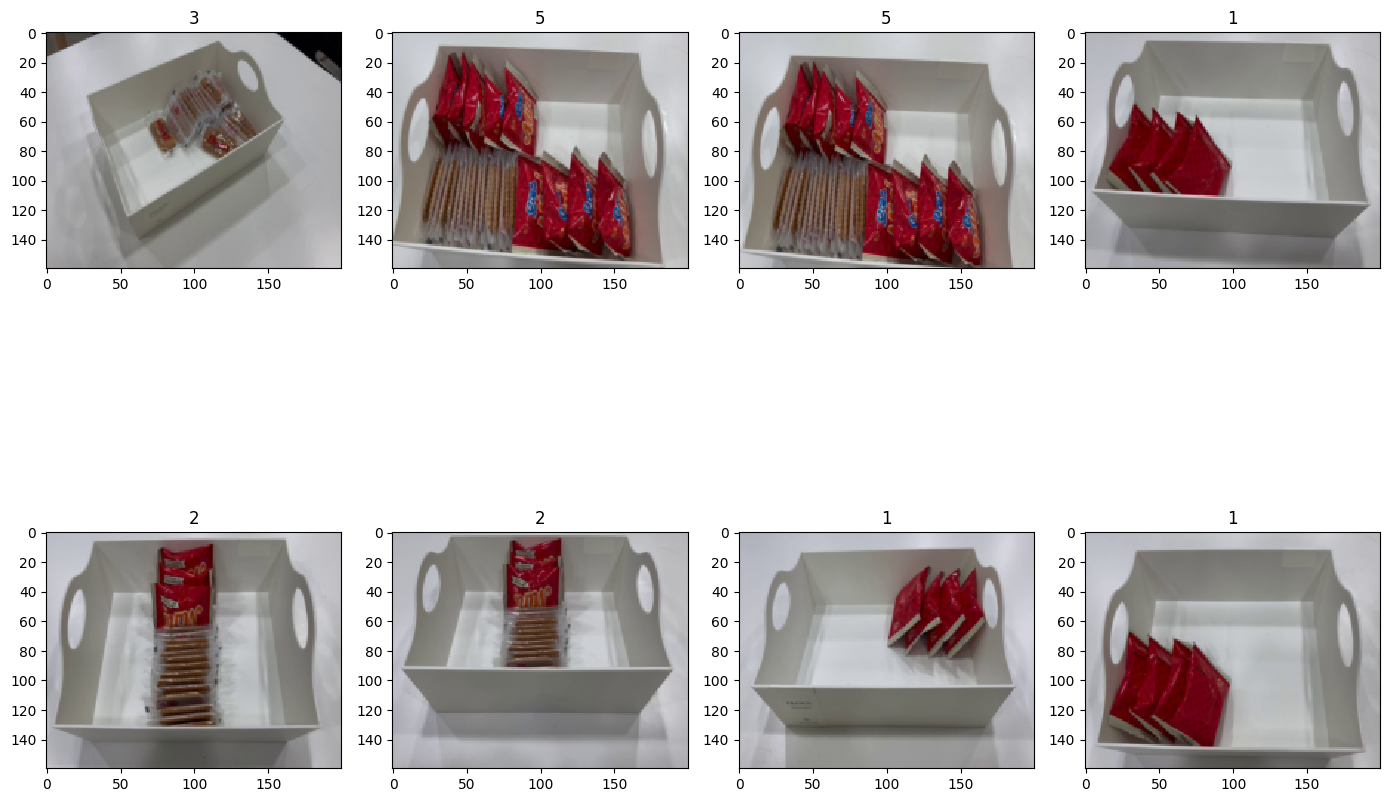

In [18]:
samples = random.choices(population = range(0, 244), k =8 )

plt.figure(figsize =(14,12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx+1)
    plt.imshow(X_train[n], cmap ='Greys',interpolation = 'nearest')
    plt.title(y_train[n])

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([layers.Conv2D(32,(3,3), activation ='relu', input_shape=(160,200,3)),
                           layers.MaxPooling2D(pool_size=(2,2), strides =(2,2)),
                           layers.Dropout(0.25),

                           layers.Conv2D(64,(3,3), activation='relu',padding ='same'),
                           layers.MaxPooling2D(pool_size=(2,2)),
                           layers.Dropout(0.25),

                           layers.Conv2D(64,(3,3), activation='relu',padding ='same'),
                           layers.MaxPooling2D(pool_size=(2,2)),
                           layers.Dropout(0.25),

                           layers.Flatten(),
                           layers.Dense(512, activation ='relu'),
                           layers.Dropout(0.25),
                           layers.Dense(2, activation ='softmax')])



model.summary()

2023-11-23 18:13:15.239588: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-23 18:13:15.239950: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-23 18:13:15.240180: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

RuntimeError: Bad StatusOr access: INTERNAL: failed initializing StreamExecutor for CUDA device ordinal 0: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_OUT_OF_MEMORY: out of memory; total memory reported: 6214516736

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import time

start_time = time.time()
hist = model.fit(X_train.reshape(2400, 180, 220, 3), y_train,
                 epochs = 10, verbose =1, #처음 5번
                 validation_data = (X_test.reshape(600, 180, 220, 3), y_test))
print("fit time :", time.time() - start_time)

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

In [ ]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

In [ ]:
wrong_result =[]

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
len(wrong_result)

In [ ]:
plt.figure(figsize =(14,12))

for idx, n in enumerate(wrong_result):
    plt.subplot(2, 4, idx +1)
    plt.imshow(X_test[n], cmap='Greys', interpolation='nearest')
    plt.title('Label :' + str(y_test[n])+ ' Predict :' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

In [ ]:
model.save('snack_model')